MATRICE DI CONFUSIONE

TEORIA:

     - https://it.wikipedia.org/wiki/Matrice_di_confusione
     - https://it.wikipedia.org/wiki/Kappa_di_Cohen
     - https://www.w3schools.com/python/python_ml_confusion_matrix.asp
     - https://datatofish.com/confusion-matrix-python/

Nell'ambito dell'Intelligenza artificiale, la matrice di confusione, detta anche tabella di errata classificazione, restituisce una rappresentazione dell'accuratezza di classificazione statistica.

Ogni colonna della matrice rappresenta i valori predetti, mentre ogni riga rappresenta i valori reali. L'elemento sulla riga i e sulla colonna j è il numero di casi in cui il classificatore ha classificato la classe "vera" i come classe j. Attraverso questa matrice è osservabile se vi è "confusione" nella classificazione di diverse classi.

Attraverso l'uso della matrice di confusione è possibile calcolare il coefficiente kappa, anche conosciuto come coefficiente kappa di Cohen. 

La matrice di confusione può essere utilizzata su valori continui (ad esempio regressione lineare)?

Le matrici di confusione mostrano l'accuratezza della previsione delle classi. Quando si tenta di prevedere un output numerico come nel caso dell'output continuo di un modello di regressione, la matrice di confusione non dovrebbe essere utilizzata.

In [ ]:
# creiamo un semplice esempio di matrice di confusione
import pandas as pd

data = {'y_actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data)
print(df)

In [2]:
# Per creare la Confusion Matrix utilizzando i panda, dovrai applicare pd.crosstab come segue
confusion_matrix = pd.crosstab(df['y_actual'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  0  1
Actual         
0          5  2
1          1  4


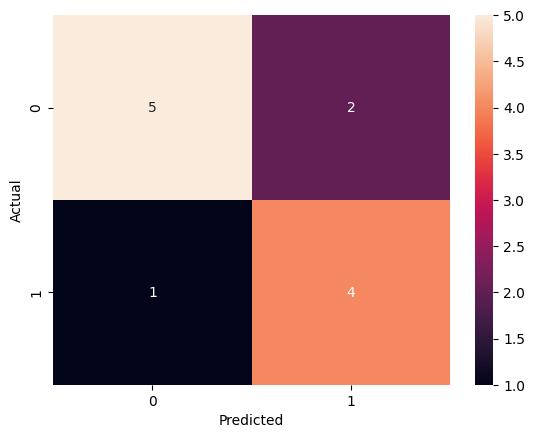

In [3]:
# Visualizzare la matrice di confusione usando Seaborn e Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix, annot=True)
plt.show()


UTILIZIAMO SKLEARN:

     - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
     - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

[[5 2]
 [1 4]]


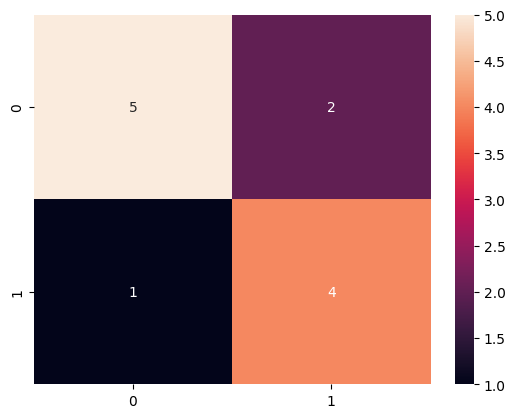

accuratezza:  0.75
precisione:  0.6666666666666666
recall:  0.8
specificità:  0.7142857142857143
F1 score:  0.7272727272727272
Kappa di Cohen:  (0.5, 'la concordanza è discreta')

Report di classificazione: 
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.67      0.80      0.73         5

    accuracy                           0.75        12
   macro avg       0.75      0.76      0.75        12
weighted avg       0.76      0.75      0.75        12



In [16]:
# importiamo da sklearn le funzioni per la matrice di confusione
from sklearn.metrics import confusion_matrix

# creiamo un semplice esempio di matrice di confusione
y_actual = [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
y_predicted = [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]

# creiamo la matrice di confusione
cm = confusion_matrix(y_actual, y_predicted)

# visualizziamo la matrice di confusione
print(cm)

# Visualizzare la matrice di confusione usando Seaborn e Matplotlib
sns.heatmap(cm, annot=True)
plt.show()

# calcoliamo l'accuratezza
# (Vero positivo + Vero negativo) / Previsioni totali
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_actual, y_predicted)
print('accuratezza: ', accuracy)

# calcoliamo la precisione
# Vero positivo / (Vero positivo + Falso positivo)
from sklearn.metrics import precision_score
precision = precision_score(y_actual, y_predicted)
print('precisione: ', precision)

# calcoliamo la recall (sensitivity)
# Vero positivo / (Vero positivo + Falso negativo)
from sklearn.metrics import recall_score
recall = recall_score(y_actual, y_predicted)
print('recall: ', recall)

# calcoliamo la specificità
# Vero negativo / (Vero negativo + Falso positivo)
specificity = recall_score(y_actual, y_predicted, pos_label=0)
print('specificità: ', specificity)

# calcoliamo la F1 score
# 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
f1 = f1_score(y_actual, y_predicted)
print('F1 score: ', f1)

# calcoliamo il coefficiente di correlazione Kappa di Cohen
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_actual, y_predicted)

def kappa_to_text(kappa):
    if kappa < 0:
        text =  "non c'è concordanza"
    elif kappa >= 0 and kappa < 0.4:
        text = "la concordanza è scarsa"
    elif kappa >= 0.4 and kappa < 0.6:
        text = "la concordanza è discreta"
    elif kappa >= 0.6 and kappa < 0.8:
        text = "la concordanza è buona"
    elif kappa >= 0.8 and kappa <= 1:
        text = "la concordanza è ottima"
    else:
        text = "errore"
    
    return kappa, text

print('Kappa di Cohen: ', kappa_to_text(kappa))

# stampiamo tutte le metriche con il report di classificazione
from sklearn.metrics import classification_report
print('\nReport di classificazione: ')
print(classification_report(y_actual, y_predicted))
